In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [9]:
# Configuration de la session TensorFlow
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

# Création de la session TensorFlow avec la configuration
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [27]:

input_data = Input(shape=(28, 28,))
hidden_layer = Flatten()(input_data)
encoder = Dense(units=196, activation="relu")(hidden_layer)
decoder = Dense(units=16*16, activation="relu")(encoder)
decoder = Reshape(target_shape=(16, 16))(decoder)
model_encoder = Model(inputs=input_data, outputs=encoder)
model = Model(inputs=input_data, outputs=decoder)
model.compile(optimizer='adam', loss='mean_squared_error')
model_encoder.compile(optimizer='adam', loss='mean_squared_error')


dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

x_train_reduced = np.array([ cv2.resize(i, (16, 16)) for i in x_train])
x_test_reduced = np.array([ cv2.resize(i, (16, 16)) for i in x_test])

model.fit(x_train, x_train_reduced, epochs=10, validation_data=(x_test, x_test_reduced))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 627.8430 - val_loss: 414.8290
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 416.7729 - val_loss: 400.7897
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 409.7286 - val_loss: 398.9233
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 408.6095 - val_loss: 398.8051
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 407.6030 - val_loss: 395.1478
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 407.4000 - val_loss: 397.5855
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 407.5165 - val_loss: 396.8691
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 406.8653 - val_loss: 396.7278
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 406.7849 - val_loss: 396.4769
Epoch 10/10
1875/1875 [=======================

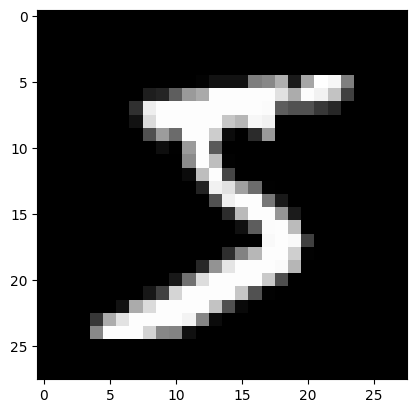

In [28]:
plt.imshow(x_train[0], cmap="gray")

In [29]:
    model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 196)               153860    
                                                                 
 dense_9 (Dense)             (None, 256)               50432     
                                                                 
 reshape_4 (Reshape)         (None, 16, 16)            0         
                                                                 
Total params: 204,292
Trainable params: 204,292
Non-trainable params: 0
_________________________________________________________________


1875/1875 [==============================] - 2s 890us/step


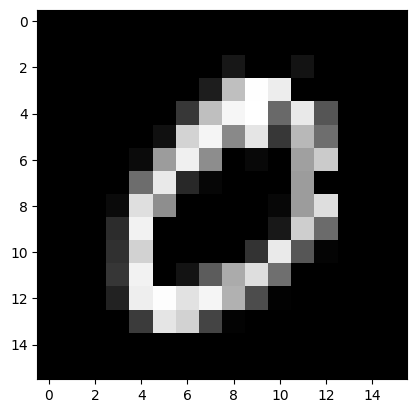

In [32]:
new_image = model.predict(x_train)
plt.imshow(new_image[0], cmap="gray")

In [86]:
x_train[0].shape

(28, 28)

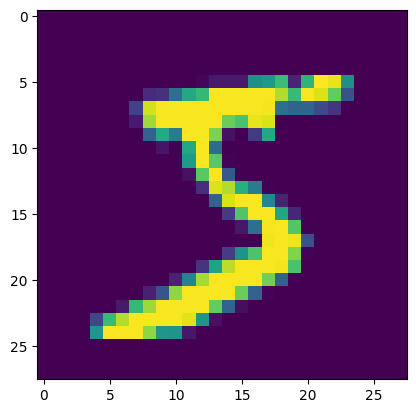

In [76]:
plt.imshow(x_train[0])

In [78]:
predicted = model.predict(x_train[0])

ValueError: in user code:

    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Syphax\Desktop\UnsupervisedDeepReinforcement\venv\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_24" (type Functional).
    
    Input 0 of layer "dense_55" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer "model_24" (type Functional):
      • inputs=tf.Tensor(shape=(None, 28), dtype=uint8)
      • training=False
      • mask=None


In [79]:
plt.imshow(predicted)

NameError: name 'predicted' is not defined